In [1]:
from bs4 import BeautifulSoup
import requests

#Gets text from url of choice
url = "https://tides4fishing.com/us/california/south-san-francisco/forecast/wind"
#requests gets text from url
txt = requests.get(url)

doc = BeautifulSoup(txt.text, "html.parser")


In [11]:
print(doc.get_text())






 Wind in South San Francisco. Wind forecast hour by hour, wind speed and wind direction in South San Francisco. 















 Tides4fishing cookies are used to personalise content and ads, save your recent fishing sites and remember your display settings. We also share information about your use of our site with our social media, advertising and analytics partners. 
  See details   OK  

    North AmericaUnited StatesCaliforniaSouth San Francisco   Settings   Change language EnglishSpanishFrenchPortugueseItalianGermanJapaneseDate and Time Settings Date Formatdd/mm/yyyymm/dd/yyyyyyyy/mm/ddFirst day of the weekMondaySundayTime format  (12-hour / 24-hour)12-hour  (am/pm)24-hourDefault units Height of the tidesMeters (m)Feet (ft)Weather units°C, km/h, hPa°F, mph, inchesDistance between starskilometers (km)Astronomic unit (AU)My recent sitesSouth San FranciscoWEEKLY FORECAST UTC-7California (	US)time change202 days (UTC -8)   Weekly forecastTidesFishingSunrise and sunsetMoonrise and

In [34]:
#find all 1h times, monday through friday
clock = doc.find_all(text="1 h")
#finding windspeed associated with that time
parent = clock[0].parent
print(clock)
print(parent)
direction = parent.next_sibling
print(direction)
speed = direction.next_sibling
print(speed.string)


['1 h', '1 h', '1 h', '1 h', '1 h', '1 h', '1 h']
<div class="f_temp_hora">1 h</div>
<div class="f_temp_hora">WSW</div>
5 mph


In [41]:
#learning how to navigate the tree of BS

actual_speeds = []
print(actual_speeds)
for i in range(7):
    parent = clock[i].parent
    direction = parent.next_sibling
    speed = direction.next_sibling
    actual_speeds.append(speed.string)
    
print(actual_speeds)

[]
['5 mph', '11 mph', '3 mph', '10 mph', '6 mph', '7 mph', '4 mph']


In [77]:

# where hour is the desired hour of the day to retrieve windspeeds from across the week

def get_speeds(hour):
        time = []
        hour = str(hour) + " h"
        clock = doc.find_all(text=hour)
        for i in range(7):
            parent = clock[i].parent
            direction = parent.next_sibling
            speed = direction.next_sibling
            time.append(speed.string)
        print(time)
        return time
    
Night = get_speeds(1)
Midday = get_speeds(13)

type(Night)


['5 mph', '11 mph', '3 mph', '10 mph', '6 mph', '7 mph', '4 mph']
['7 mph', '7 mph', '16 mph', '12 mph', '11 mph', '8 mph', '7 mph']


list

In [100]:
#clean data

Night = get_speeds(1)


def clean_data(data):
    for i in range(7):
        data[i] = int(data[i].replace(" mph", ""))
    return data

clean_data(Night)        
print(Night)
clean_data(Midday)
print(Midday)


['5 mph', '11 mph', '3 mph', '10 mph', '6 mph', '7 mph', '4 mph']
[5, 11, 3, 10, 6, 7, 4]
[7, 7, 16, 12, 11, 8, 7]


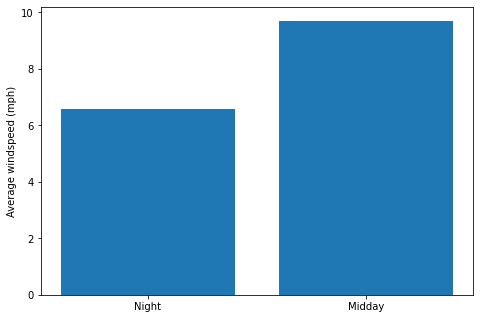

None


In [104]:
#Plotting a graph with extracted data
import matplotlib.pyplot as plt
from statistics import mean

night = mean(Night)
midday = mean(Midday)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
time = ["Night", "Midday"]
value = [night, midday]
ax.bar(time,value)
ax.set_ylabel("Average windspeed (mph)")
print(plt.show())



